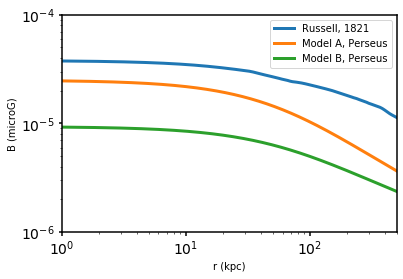

In [4]:
%matplotlib inline
from alpro import models, util
import numpy as np 
import matplotlib.pyplot as plt 
util.set_default_plot_params()
r = np.logspace(0,3,num=1000)

russell = models.ClusterProfile(model="russell")
modA = models.ClusterProfile(model="a")
modB = models.ClusterProfile(model="b")

plt.plot(r, russell.get_B(r), label="Russell, 1821")
plt.plot(r, modA.get_B(r), label="Model A, Perseus")
plt.plot(r, modB.get_B(r), label="Model B, Perseus")
plt.loglog()
plt.ylabel("B (microG)")
plt.xlabel("r (kpc)")
plt.ylim(1e-6,1e-4)
plt.xlim(1,500)
plt.legend()

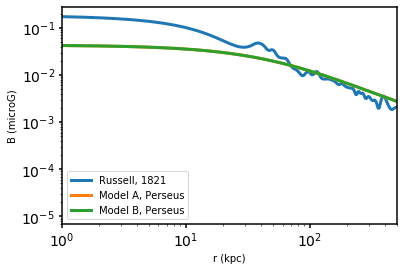

In [2]:
plt.plot(r, russell.density(r), label="Russell, 1821")
plt.plot(r, modA.density(r), label="Model A, Perseus")
plt.plot(r, modB.density(r), label="Model B, Perseus")
plt.loglog()
plt.ylabel("n (/cm^3)")
plt.xlabel("r (kpc)")
#plt.ylim(1e-6,1e-4)
plt.xlim(1,500)
l = plt.legend()